In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def test_model(model, data):
    X_train, X_test, y_train, y_test = data
    cls = model.fit(X_train, y_train)
    print(f'Model: {type(cls).__name__}')
    print(f'Train score: {cls.score(X_train, y_train)}')
    print(f'Test Score: {cls.score(X_test, y_test)}\n')

In [3]:
csv_file = "garments_worker_productivity.csv"

# Read the CSV file into a Pandas DataFrame
data_df = pd.read_csv(csv_file)

# Review the DataFrame
data_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Preprocess the data

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
data_df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
# Check the data types
data_df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [33]:
# Fix the NaN values in Column
df_clean = data_df.copy()
df_clean['wip'] = df_clean['wip'].fillna(df_clean['wip'].mean()/2)
df_clean.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,595.232996,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [34]:
# Change target column values from numerical to categorial
bins = [0, 0.50, 0.75, 1.5]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define labels for the bins

df_clean['actual_productivity_category'] = pd.cut(df_clean['actual_productivity'], bins=bins, labels=labels, include_lowest=True)
df_clean

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,actual_productivity_category
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,High
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,595.232996,960,0,0.0,0,0,8.0,0.886500,High
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,High
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,High
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,595.232996,960,0,0.0,0,0,8.0,0.628333,Medium
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,595.232996,960,0,0.0,0,0,8.0,0.625625,Medium
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,595.232996,960,0,0.0,0,0,8.0,0.625625,Medium
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,595.232996,1800,0,0.0,0,0,15.0,0.505889,Medium


In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   date                          1197 non-null   object  
 1   quarter                       1197 non-null   object  
 2   department                    1197 non-null   object  
 3   day                           1197 non-null   object  
 4   team                          1197 non-null   int64   
 5   targeted_productivity         1197 non-null   float64 
 6   smv                           1197 non-null   float64 
 7   wip                           1197 non-null   float64 
 8   over_time                     1197 non-null   int64   
 9   incentive                     1197 non-null   int64   
 10  idle_time                     1197 non-null   float64 
 11  idle_men                      1197 non-null   int64   
 12  no_of_style_change            1197 non-null   in

In [36]:
df_clean.isna().sum()

date                            0
quarter                         0
department                      0
day                             0
team                            0
targeted_productivity           0
smv                             0
wip                             0
over_time                       0
incentive                       0
idle_time                       0
idle_men                        0
no_of_style_change              0
no_of_workers                   0
actual_productivity             0
actual_productivity_category    0
dtype: int64

In [37]:
target_var = ["actual_productivity", "actual_productivity_category"]
# Split data into training and testing datasets
X = df_clean.drop(target_var, axis=1)  # replace with your target column
y = df_clean["actual_productivity_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')

# Fit and transform and Create DataFrames
X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame(data=ohe.transform(X_test), columns=ohe.get_feature_names_out())

## Check for Missing Values

In [39]:
# Find the percentage of null values in each column
X_train_encoded.isna().sum()/len(X_train_encoded)

date_1/1/2015         0.0
date_1/10/2015        0.0
date_1/11/2015        0.0
date_1/12/2015        0.0
date_1/13/2015        0.0
                     ... 
no_of_workers_58.0    0.0
no_of_workers_58.5    0.0
no_of_workers_59.0    0.0
no_of_workers_59.5    0.0
no_of_workers_60.0    0.0
Length: 796, dtype: float64

In [40]:
data = [X_train_encoded, X_test_encoded, y_train, y_test]

# Trying Different Models of Classification to Analyze the Data

In [41]:
test_model(LogisticRegression(random_state=1), data)
test_model(SVC(), data)
test_model(KNeighborsClassifier(n_neighbors=9), data)
test_model(DecisionTreeClassifier(), data)
test_model(RandomForestClassifier(n_estimators=128, random_state=1), data)

Model: LogisticRegression
Train score: 0.910394265232975
Test Score: 0.75

Model: SVC
Train score: 0.8685782556750299
Test Score: 0.75

Model: KNeighborsClassifier
Train score: 0.7897252090800478
Test Score: 0.7

Model: DecisionTreeClassifier
Train score: 1.0
Test Score: 0.7333333333333333

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.7722222222222223



In [42]:
# Try the following values for max_depth

max_depths = range(1, 10)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    clf = RandomForestClassifier(max_depth = depth)
    clf.fit(X_train_encoded, y_train)

    train_pred = clf.predict(X_train_encoded)
    test_pred = clf.predict(X_test_encoded)

    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')

<Axes: xlabel='max_depth'>

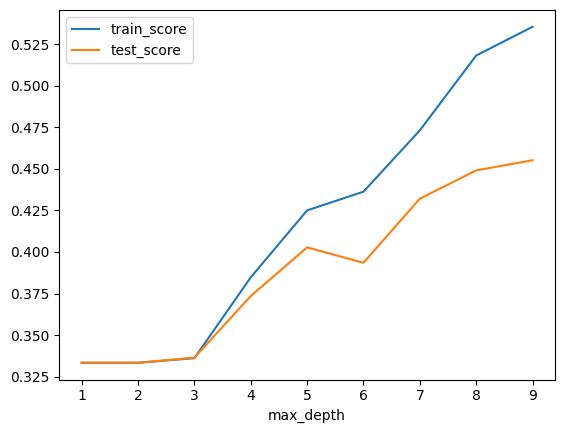

In [43]:
# Plot the results
models_df.plot()

In [46]:
# Pick the depth value from the plot above
depth = 7
clf = RandomForestClassifier(max_depth=depth)
clf.fit(X_train_encoded, y_train) 

train_pred = clf.predict(X_train_encoded)
test_pred = clf.predict(X_test_encoded)

print('Random Forest Classifier - Balanced Accuracy Score')
print(f'Train score: {balanced_accuracy_score(y_train, train_pred)}')
print(f'Test Score: {balanced_accuracy_score(y_test, test_pred)}')

Random Forest Classifier - Balanced Accuracy Score
Train score: 0.4732860520094562
Test Score: 0.4289688749782646


In [55]:
data_corr = df_clean.drop(["date","quarter","department","day","actual_productivity_category"], axis=1)
correlation_matrix = data_corr.corr()
print(correlation_matrix['actual_productivity'])

team                    -0.148753
targeted_productivity    0.421594
smv                     -0.122089
wip                      0.068393
over_time               -0.054206
incentive                0.076538
idle_time               -0.080851
idle_men                -0.181734
no_of_style_change      -0.207366
no_of_workers           -0.057991
actual_productivity      1.000000
Name: actual_productivity, dtype: float64


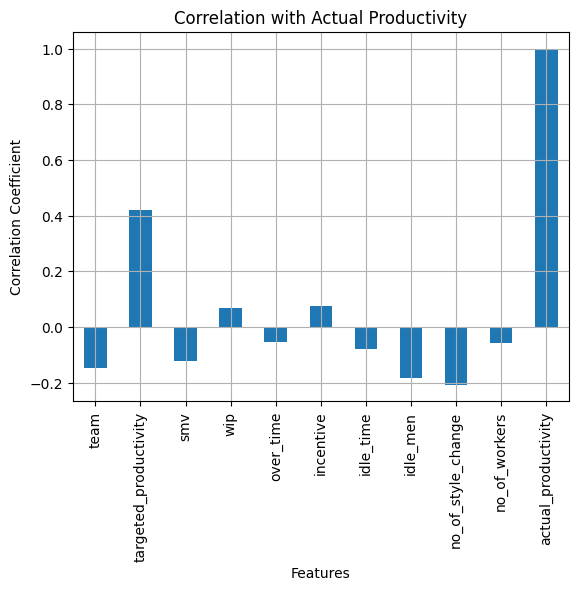

In [60]:
# Plotting the correlation with actual_productivity_category
correlation_with_target = correlation_matrix['actual_productivity']
correlation_with_target.plot(kind='bar', grid=True)
plt.title('Correlation with Actual Productivity')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

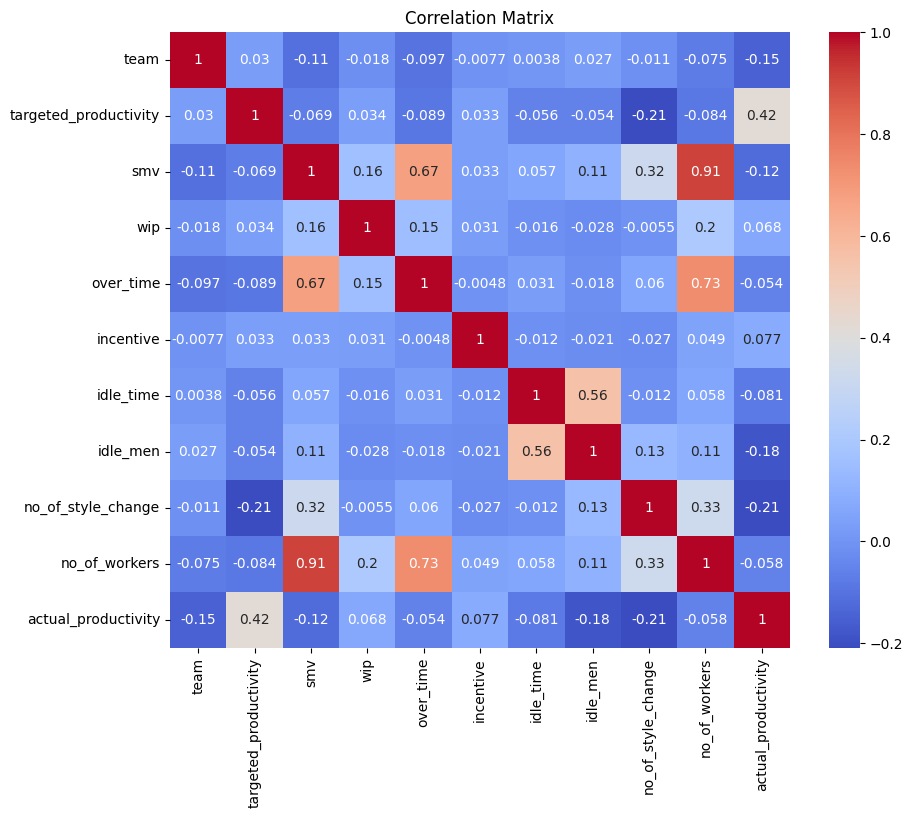

In [61]:
# Heatmap to visualize the correlation between multiple features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Plots

In [ ]:
# Seaborn Plots
sns.set()
plt.plot(X, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
# Histogram
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

In [ ]:
# Combine Historgram and KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

In [ ]:
# two-dimensional visualization of the data
sns.kdeplot(data);

In [ ]:
# joint distribution and the marginal distributions
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

In [ ]:
# hexagonally based histogram instead
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

# stuff below is extra old code

In [ ]:
## Model and Fit to a Support Vector Machine

In [ ]:
# Create the support vector machine classifier model with a 'linear' kernel
svm_model = SVC(kernel='linear')

# Fit the model to the training data
svm_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test))

In [ ]:
## Model and Fit to a KNN Model

In [ ]:
# Create the KNN model with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test))

In [ ]:
## Model and Fit to a Decision Tree Classifier

In [ ]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test))

In [ ]:
## Model and Fit to a Random Forest Classifier

In [ ]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test))

In [ ]:
# Show all models' scores
print("Logistic Regression Model")
print('Train Accuracy: %.3f' % lr_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % lr_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("Support Vector Machine Model")
print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("K Nearest Neighbor Model")
print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("Decision Tree Model")
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("Random Forrest Model")
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test))